In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from env import user, password, host
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import os
import csv
import wrangle_zillow
import prepare
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

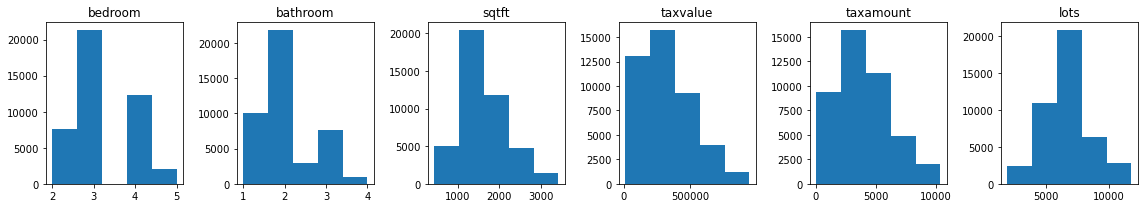

In [2]:
# load zillow data
zillow_train,zillow_validate,zillow_test=wrangle_zillow.wrangle_zillow(1.5)

In [3]:
# understand the data
zillow_train.columns

Index(['bedroom', 'bathroom', 'sqtft', 'taxvalue', 'yearbuilt', 'taxamount',
       'fips', 'lots', 'zipcode', 'assessmentyear', 'transactiondate',
       'taxrate'],
      dtype='object')

In [4]:
# understand the data
zillow_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24257 entries, 9653 to 47564
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom          24257 non-null  float64
 1   bathroom         24257 non-null  float64
 2   sqtft            24257 non-null  float64
 3   taxvalue         24257 non-null  float64
 4   yearbuilt        24249 non-null  object 
 5   taxamount        24257 non-null  float64
 6   fips             24257 non-null  object 
 7   lots             24257 non-null  float64
 8   zipcode          24247 non-null  object 
 9   assessmentyear   24257 non-null  object 
 10  transactiondate  24257 non-null  object 
 11  taxrate          24257 non-null  object 
dtypes: float64(6), object(6)
memory usage: 2.4+ MB


In [5]:
# drop columns for problem 2
zillow_train = zillow_train.drop(columns=['bedroom', 'bathroom', 'yearbuilt', 'taxamount',
       'fips', 'lots', 'zipcode', 'assessmentyear', 'transactiondate',
       'taxrate'])

In [6]:
# validate the previous code is inplace
zillow_train

,sqtft,taxvalue
9653,2620.0,615795.0
27478,917.0,228431.0
23921,1513.0,71351.0
26263,1100.0,240942.0
36764,1144.0,127118.0
...,...,...
5108,1532.0,144516.0
37436,1045.0,156323.0
24363,2392.0,345196.0
24885,1212.0,53253.0


In [7]:
# problem 2
# linear regression
zillow_train['sqtft'] = MinMaxScaler().fit_transform(zillow_train[['sqtft']])

In [8]:
zillow_train

,sqtft,taxvalue
9653,0.730563,615795.0
27478,0.159853,228431.0
23921,0.359584,71351.0
26263,0.221180,240942.0
36764,0.235925,127118.0
...,...,...
5108,0.365952,144516.0
37436,0.202748,156323.0
24363,0.654155,345196.0
24885,0.258713,53253.0


In [9]:
# split to x_train and y_train
zillow_x_train = zillow_train[['sqtft']]
zillow_y_train = zillow_train.taxvalue

zillow_x_validate = zillow_validate[['sqtft']]
zillow_y_validate = zillow_validate.taxvalue

zillow_x_test = zillow_test[['sqtft']]
zillow_y_test = zillow_test.taxvalue

In [10]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(zillow_x_train, zillow_y_train)
predictions = model.predict(zillow_x_train)

In [11]:
predictions

array([472491.89976391, 214582.04570067, 304842.92240161, ...,
       437962.57109309, 259258.15077915, 193531.27076538])

In [12]:
zillow_train['yhat']=predictions

In [13]:
zillow_train

,sqtft,taxvalue,yhat
9653,0.730563,615795.0,472491.899764
27478,0.159853,228431.0,214582.045701
23921,0.359584,71351.0,304842.922402
26263,0.221180,240942.0,242296.375292
36764,0.235925,127118.0,248959.929948
...,...,...,...
5108,0.365952,144516.0,307720.366458
37436,0.202748,156323.0,233966.931972
24363,0.654155,345196.0,437962.571093
24885,0.258713,53253.0,259258.150779


In [14]:
# create residual columns
zillow_train['residual']=zillow_train.taxvalue-zillow_train.yhat
zillow_train

,sqtft,taxvalue,yhat,residual
9653,0.730563,615795.0,472491.899764,143303.100236
27478,0.159853,228431.0,214582.045701,13848.954299
23921,0.359584,71351.0,304842.922402,-233491.922402
26263,0.221180,240942.0,242296.375292,-1354.375292
36764,0.235925,127118.0,248959.929948,-121841.929948
...,...,...,...,...
5108,0.365952,144516.0,307720.366458,-163204.366458
37436,0.202748,156323.0,233966.931972,-77643.931972
24363,0.654155,345196.0,437962.571093,-92766.571093
24885,0.258713,53253.0,259258.150779,-206005.150779


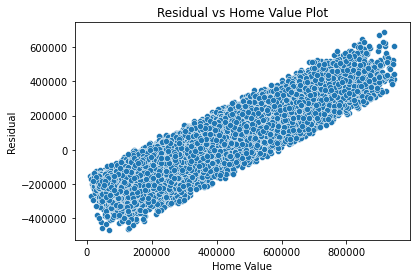

In [15]:
# problem 3
sns.scatterplot(data=zillow_train, x='taxvalue', y='residual')

plt.xlabel('Home Value')
plt.ylabel('Residual')
plt.title('Residual vs Home Value Plot')
plt.show()

In [16]:
# Calculate the sum of squared errors, explained sum of squares, 
# total sum of squares, mean squared error, and root mean squared error for your model
MSE = mean_squared_error(zillow_train.taxvalue, zillow_train.yhat)
MSE

31518921688.292255

In [17]:
SSE = MSE * len(zillow_train)
SSE

764554483392905.2

In [18]:
RMSE = MSE**.5
RMSE

177535.69130823316

In [19]:
ESS = ((zillow_train.yhat - zillow_train.taxvalue.mean())**2).sum()
ESS

163345256050760.9

In [20]:
TSS = ESS + SSE
TSS

927899739443666.1

In [21]:
zillow_train['baseline'] = zillow_train.taxvalue.mean()

In [22]:
zillow_train

,sqtft,taxvalue,yhat,residual,baseline
9653,0.730563,615795.0,472491.899764,143303.100236,320354.428825
27478,0.159853,228431.0,214582.045701,13848.954299,320354.428825
23921,0.359584,71351.0,304842.922402,-233491.922402,320354.428825
26263,0.221180,240942.0,242296.375292,-1354.375292,320354.428825
36764,0.235925,127118.0,248959.929948,-121841.929948,320354.428825
...,...,...,...,...,...
5108,0.365952,144516.0,307720.366458,-163204.366458,320354.428825
37436,0.202748,156323.0,233966.931972,-77643.931972,320354.428825
24363,0.654155,345196.0,437962.571093,-92766.571093,320354.428825
24885,0.258713,53253.0,259258.150779,-206005.150779,320354.428825


In [23]:
MSE_baseline = mean_squared_error(zillow_train.taxvalue, zillow_train.baseline)
MSE_baseline

38252864717.14002

In [24]:
SSE_baseline = MSE_baseline * len(zillow_train)
SSE_baseline

927899739443665.5

In [25]:
RMSE_baseline = MSE_baseline**.5
RMSE_baseline

195583.39581145436

In [26]:
if SSE < SSE_baseline:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline. :( )')

My OSL model performs better than baseline


In [27]:
r2_score(zillow_train.taxvalue,zillow_train.yhat)

0.17603761387916328

In [28]:
RMSE_baseline - RMSE

18047.704503221205

In [29]:
def evaluate(y, yhat):
    residuals = y - yhat
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    print('SSE is ',SSE,'\n','ESS is ', ESS,'\n','TSS is ', TSS,'\n','MSE is', MSE,'\n','RMSE is ', RMSE)
    '\n'
    print('---------------------')
    print ('baseline mean error:')
    baseline = np.repeat(y.mean(), len(y))
    b_MSE = mean_squared_error(y, baseline)
    b_SSE = b_MSE * len(y)
    b_RMSE = b_MSE**.5
    print('Baseline SSE is ',b_SSE,'\n','Baseline MSE is', b_MSE,'\n','Baseline RMSE is ', b_RMSE)
    '\n'
    print('---------------------')
    if SSE < b_SSE:
        print('My regression model performs better than baseline')
    else:
        print('My regression model performs worse than baseline')

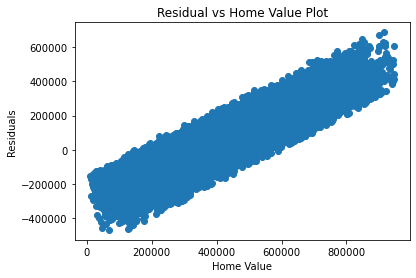

SSE is  764554483392905.2 
 ESS is  163345256050760.9 
 TSS is  927899739443666.1 
 MSE is 31518921688.292255 
 RMSE is  177535.69130823316
---------------------
baseline mean error:
Baseline SSE is  927899739443665.5 
 Baseline MSE is 38252864717.14002 
 Baseline RMSE is  195583.39581145436
---------------------
My regression model performs better than baseline


In [30]:
evaluate(zillow_train.taxvalue,zillow_train.yhat)